In [3]:
#Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns

# Import API key
from api_keys import api_key


In [4]:
import json

# creating api call from a city though url 
base_url = "https://api.fda.gov/drug/event.json?api_key=" + api_key

#base_url="https://api.ers.usda.gov/data/arms/category?api_key=" + api_key + "&id=age,ftypll"
#https://api.ers.usda.gov/data/arms/farmtype?api_key=YOUR_API_KEY&name=operator+households
# changing the output to json 
print(base_url)
req = requests.get(base_url)
data = req.json()
print(data)

https://api.fda.gov/drug/event.json?api_key=8CNbFdll08EsavhOoWDSJ204sBafUl3X75goqqpT
{'meta': {'disclaimer': 'Do not rely on openFDA to make decisions regarding medical care. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated. We may limit or otherwise restrict your access to the API in line with our Terms of Service.', 'terms': 'https://open.fda.gov/terms/', 'license': 'https://open.fda.gov/license/', 'last_updated': '2021-11-04', 'results': {'skip': 0, 'limit': 1, 'total': 14128106}}, 'results': [{'receiptdateformat': '102', 'receiver': None, 'seriousnessdeath': '1', 'companynumb': 'JACAN16471', 'receivedateformat': '102', 'primarysource': {'reportercountry': 'CANADA', 'qualification': '3'}, 'transmissiondateformat': '102', 'fulfillexpeditecriteria': '1', 'safetyreportid': '5801206-7', 'sender': {'senderorganization': 'FDA-Public Use'}, 'receivedate': '20080707', 'patient': {'patientonsetage': '26', 'patientonsetageunit': '801', 

In [12]:
cats_data = {'gender':[],
                'age':[],
                'weight':[],
                'breed':[],
                'drug':[],
                'outcome':[],
                'date_in':[]}
#base_url = "https://api.fda.gov/drug/event.json?api_key=" + api_key + '"search=animal.species:"Cat""'
base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+animal.breed.breed_component='Domestic Shorthair'"
req = requests.get(base_url)
data = req.json()

#print(data)
#https://api.fda.gov/animalandveterinary/event.json?search=animal.species:"Cat"
#if data['animal']['species']=="Cat":
cats_data['gender'].append(data['results'][0]['animal']['gender'])
cats_data['age'].append(data['results'][0]['animal']['age']['min'])
cats_data['weight'].append(data['results'][0]['animal']['weight']['min'])
cats_data['breed'].append(data['results'][0]['animal']['breed']['breed_component'])
cats_data['drug'].append(data['results'][0]['drug'][0]['active_ingredients'][0]['name'])
cats_data['outcome'].append(data['results'][0]['outcome'][0]['medical_status'])
cats_data['date_in'].append(data['results'][0]['original_receive_date'])

print(cats_data)


{'gender': ['Male'], 'age': ['10.00'], 'weight': ['6.350'], 'breed': ['Domestic Shorthair'], 'drug': ['Spinosad'], 'outcome': ['Recovered/Normal'], 'date_in': ['20170508']}


In [17]:
# option for looping - force it to skip 5 and then pick up the next one. The for loop returns 20 cats.
cats_data = {'gender':[],
                'age':[],
                'weight':[],
                'breed':[],
                'drug':[],
                'outcome':[],
                'date_in':[]}
base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+(animal.breed.breed_component='Domestic Shorthair'+OR+animal.breed.breed_component='Domestic Longhair')"
counter = 1
for i in range(500):

#base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+animal.breed.breed_component='Domestic Shorthair'"
#base_url = "https://api.fda.gov/drug/event.json?api_key=" + api_key
#base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+original_receive_date:[20040101+TO+20161107]&limit=1"
    req = requests.get(base_url)
    data = req.json()

    try:
        cats_data['age'].append(data['results'][0]['animal']['age']['min'])
    except:
        cats_data['age'].append('Unknown')
    
    try:
        cats_data['weight'].append(data['results'][0]['animal']['weight']['min'])
    except:
        cats_data['weight'].append('Unknown')

    try:
        cats_data['outcome'].append(data['results'][0]['outcome'][0]['medical_status'])
    except:
        cats_data['outcome'].append('Unknown')
    
    try:
        cats_data['date_in'].append(data['results'][0]['original_receive_date'])
    except:
        cats_data['date_in'].append(np.nan)

    try:
        cats_data['gender'].append(data['results'][0]['animal']['gender'])
    except:
        cats_data['gender'].append('Unknown')
    
    try:
        cats_data['breed'].append(data['results'][0]['animal']['breed']['breed_component'])
    except:
        cats_data['breed'].append('Unknown')
    
    try:
        cats_data['drug'].append(data['results'][0]['drug'][0]['active_ingredients'][0]['name'])
    except:
        cats_data['drug'].append('Unknown')
        
        
    counter +=1
    str_count = str(counter)
    base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+(animal.breed.breed_component='Domestic Shorthair'+OR+animal.breed.breed_component='Domestic Longhair')&skip=" + str_count
    
print(cats_data)

{'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Unknown', 'Male', 'Female', 'Unknown', 'Male', 'Unknown', 'Female', 'Male', 'Male', 'Male', 'Male', 'Unknown', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Unknown', 'Unknown', 'Unknown', 'Male', 'Unknown', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Unknown', 'Male', 'Male', 'Male', 'Unknown', 'Mixed', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Unknown', 'Female', 'Male', 'Unknown', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Unknown', 'Female', 'Female', 'Male', 'Fem

In [18]:
cat_df = pd.DataFrame.from_dict(cats_data)
cat_df.to_csv("cat_data.csv")
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   gender   500 non-null    object
 1   age      500 non-null    object
 2   weight   500 non-null    object
 3   breed    500 non-null    object
 4   drug     500 non-null    object
 5   outcome  500 non-null    object
 6   date_in  500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


In [19]:
cat_df.head(40)

,gender,age,weight,breed,drug,outcome,date_in
0,Male,10.00,6.350,Domestic Shorthair,Spinosad,Recovered/Normal,20170508
1,Female,12.00,3.130,Domestic Shorthair,Cefovecin,Ongoing,20171002
2,Male,1.00,4.309,Domestic Shorthair,Spinosad,Recovered/Normal,20180205
3,Female,9.00,Unknown,Domestic Shorthair,Imidacloprid,Outcome Unknown,20190327
4,Male,5.00,6.577,Domestic Shorthair,Maropitant Citrate,Ongoing,20190220
5,Male,2.00,5.897,Domestic Shorthair,Fluralaner Spot-On Solution,Ongoing,20190721
6,Male,8.00,8.845,Domestic Longhair,Spinosad,Recovered/Normal,20190307
7,Unknown,Unknown,Unknown,Cat (unknown),Imidacloprid,Recovered/Normal,20210503
8,Male,9.00,4.309,Domestic Shorthair,Fluralaner Spot-On Solution,Ongoing,20200515
9,Female,11.00,2.722,Cat (unknown),Imidacloprid,Outcome Unknown,20210518


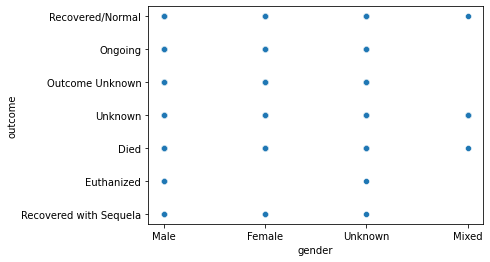

In [22]:
sns.scatterplot(y='outcome', x='gender', data=cat_df)
plt.show()



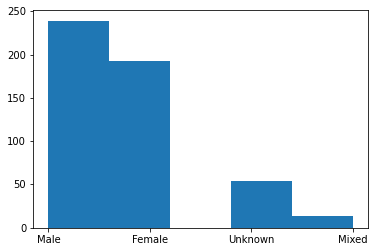

In [23]:
plt.hist(cat_df['gender'], bins=5)
plt.show()